In [27]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import os

In [28]:
datasets = {"agnews": 1, "mnli": 0, "yahoo": 5, "yelp-full": 0}
datapoint = [1,2,4,8,16,32]
colors=['r','g','b','y','c','m']

/home/cdq/FedPet/log/wyz/log/agnews/all_1000/seed_42/pattern_1/alpha_0_beta_0_gamma_100.0/diff_data_point_aug_agnews_1_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_256.log
max accuracy is 0.8886842105263157, round is 38
/home/cdq/FedPet/log/wyz/log/agnews/all_1000/seed_42/pattern_1/alpha_0_beta_0_gamma_100.0/diff_data_point_aug_agnews_2_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_256.log
max accuracy is 0.8889473684210526, round is 224
/home/cdq/FedPet/log/wyz/log/agnews/all_1000/seed_42/pattern_1/alpha_0_beta_0_gamma_100.0/diff_data_point_aug_agnews_4_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_256.log
max accuracy is 0.8821052631578947, round is 16
/home/cdq/FedPet/log/wyz/log/agnews/all_1000/seed_42/pattern_1/alpha_0_beta_0_gamma_100.0/diff_data_point_aug_agnews_8_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_256.log
max accuracy is 0.8810526315789474, round is 56
/home/cdq/FedPet/log/wyz/log/agnews/all_1000/seed_42/pattern_1/alpha_0_beta_0_gamma_100.0/diff_data_point_a

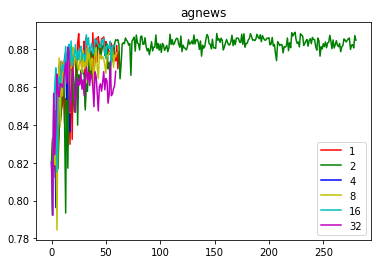

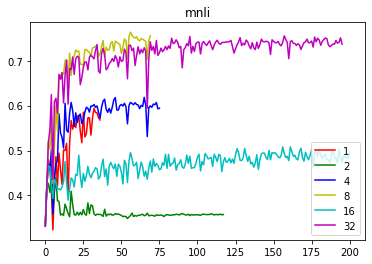

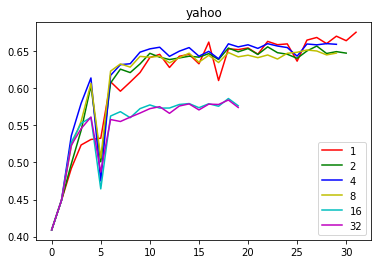

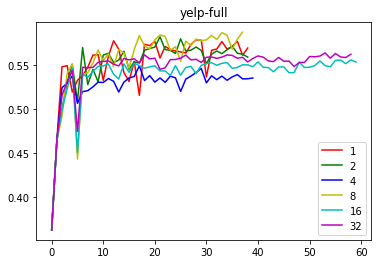

In [29]:
# round to accuracy
i=0
acc_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}
round_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}
for dataset in datasets:
    root_path = f"/home/cdq/FedPet/log/wyz/log/{dataset}/all_1000/seed_42/pattern_{datasets[dataset]}/alpha_0_beta_0_gamma_100.0"
    filenames = [
    f"diff_data_point_aug_{dataset}_{datapoint}_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_256.log" for datapoint in [1,2,4,8,16,32]
    ]

    fig = plt.figure()
    plt.title(f"{dataset}")
    for filename in filenames:
            
        log_path = os.path.join(root_path, filename)
        if not os.path.exists(log_path):
            print(f"{log_path} not exists")
            continue


        # plt.title(log_path)
        iter = 1000
        phrase = 'aggregated model performance is'
        with open(log_path) as f:
            f = f.readlines()
        df = pd.DataFrame(data=None, index = range(iter), columns = range(1))
        for line in f:
            if phrase in line:
                gen = int(re.findall(r'Gen (.+?) ',line)[0])
                
                acc = float(re.findall(r': ?(\d+\.\d+)',line)[0])
                df[0][gen]=acc

        df = df.dropna(axis=0, how='any') # any 只要有 nan 就会删掉。 all　是必须全是nan才删除; 0: 行；1：列
        if df.empty:
            print(f"Bug: {log_path}")
            continue

        # print(filename)
        # print(df)
        this_max_acc = np.max(df[0])
        idx = [df[0].to_list().index(x) for x in df[0] if x == this_max_acc][0]
        print(log_path)
        print(f"max accuracy is {this_max_acc}, round is {idx}")
        acc_list[dataset].append(this_max_acc)
        round_list[dataset].append(idx)
        # df.to_csv("/Users/cdq/Desktop/opensource/FedPrompt/data/softlabel/agnews_aug_fedpet_128_32_roberta-large.csv")
        iter = len(df.index)
        y_mean = []
        for j in range(iter):
            y = np.array(df.iloc[j])

            y_mean.append(pd.DataFrame(y).dropna().mean())
            # plt.scatter(j, y)
                
        plt.plot(range(iter),y_mean,label=datapoint[filenames.index(filename)],color=colors[filenames.index(filename)])
    plt.legend(loc='lower right')
    fig.savefig(f"../fig/a{i}.png")
    i = i+1

In [30]:
print(acc_list)
print(round_list)

{'agnews': [0.8886842105263157, 0.8889473684210526, 0.8821052631578947, 0.8810526315789474, 0.8876315789473684, 0.8810526315789474], 'mnli': [0.5940906775343862, 0.4391237901171676, 0.6185430463576159, 0.7634233316352521, 0.5082017320427916, 0.7552725420275089], 'yahoo': [0.6756666666666666, 0.6570333333333334, 0.6603166666666667, 0.6517166666666667, 0.58625, 0.58425], 'yelp-full': [0.57934, 0.58266, 0.54954, 0.5879, 0.55634, 0.5643]}
{'agnews': [38, 224, 16, 56, 32, 15], 'mnli': [32, 7, 65, 56, 161, 157], 'yahoo': [31, 27, 28, 26, 18, 18], 'yelp-full': [28, 21, 17, 37, 58, 53]}


/home/cdq/FedPet/log/wyz/log/agnews/all_1000/seed_42/pattern_1/alpha_0_beta_0_gamma_100.0/diff_data_point_aug_agnews_1_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_256.log
max accuracy is 0.8886842105263157, runtime is 13327.5
63 63
/home/cdq/FedPet/log/wyz/log/agnews/all_1000/seed_42/pattern_1/alpha_0_beta_0_gamma_100.0/diff_data_point_aug_agnews_2_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_256.log
max accuracy is 0.8889473684210526, runtime is 156267.5
281 281
/home/cdq/FedPet/log/wyz/log/agnews/all_1000/seed_42/pattern_1/alpha_0_beta_0_gamma_100.0/diff_data_point_aug_agnews_4_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_256.log
max accuracy is 0.8821052631578947, runtime is 6181.0
18 18
/home/cdq/FedPet/log/wyz/log/agnews/all_1000/seed_42/pattern_1/alpha_0_beta_0_gamma_100.0/diff_data_point_aug_agnews_8_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_256.log
max accuracy is 0.8810526315789474, runtime is 35131.5
61 61
/home/cdq/FedPet/log/wyz/log/agnews/all_1000/seed_42/p

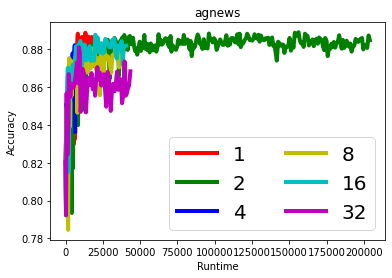

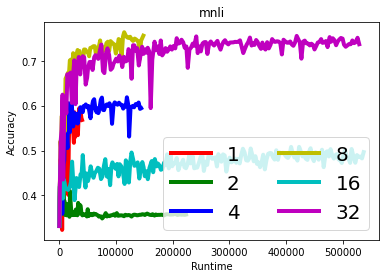

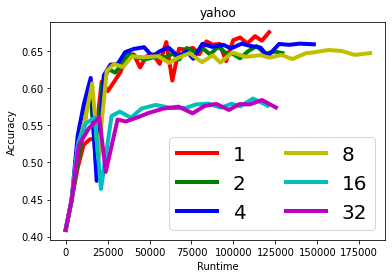

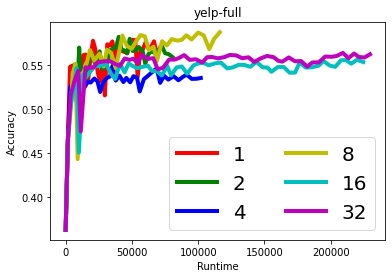

In [45]:
# time to accuracy  
t = 0 
acc_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}
runtime_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}
for dataset in datasets:
    root_path = f"/home/cdq/FedPet/log/wyz/log/{dataset}/all_1000/seed_42/pattern_{datasets[dataset]}/alpha_0_beta_0_gamma_100.0"
    filenames = [
    f"diff_data_point_aug_{dataset}_{datapoint}_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_256.log" for datapoint in [1,2,4,8,16,32]
    ]
    fig = plt.figure()
    plt.title(f"{dataset}")
    plt.xlabel("Runtime")
    plt.ylabel("Accuracy")
    for filename in filenames:

        log_path = os.path.join(root_path, filename)
        if not os.path.exists(log_path):
            print(f"{log_path} not exists")
            continue

        iter = 1000
        phrase = 'train data'
        with open(log_path) as f:
            f = f.readlines()
        df = pd.DataFrame(data=None, index = range(iter), columns = range(1))
        runtime = []
        train_runtime = []
        infer_runtime = []
        time_stamp = 0
        train_time_stamp = 0
        infer_time_stamp = 0

        for line in f:
            if phrase in line:
                line_idx = f.index(line)
                
                train_info = f[line_idx]
                infer_info = f[line_idx + 1]
                
                # TX2: train, 1s/sample, infer, 0.5s/sample
                train_time = sum(list(map(int, re.findall(r'\d+', train_info.split("Gen")[1])))[1:]) * 1 
                infer_time = sum(list(map(int, re.findall(r'\d+', infer_info.split("Gen")[1])))[1:]) * 0.5
                
                time_stamp = time_stamp + train_time + infer_time # elasped time of all clients / energy consumption
                train_time_stamp = train_time + train_time_stamp
                infer_time_stamp = infer_time + infer_time_stamp

                runtime.append(time_stamp)
                train_runtime.append(train_time_stamp)
                infer_runtime.append(infer_time_stamp)
            if 'aggregated model performance is' in line: 
                gen = int(re.findall(r'Gen (.+?) ',line)[0])
                
                acc = float(re.findall(r': ?(\d+\.\d+)',line)[0])
                df[0][gen]=acc

        df = df.dropna(axis=0, how='any') # any 只要有 nan 就会删掉。 all　是必须全是nan才删除; 0: 行；1：列
        if df.empty:
            print(f"Bug: {log_path}")

        this_max_acc = np.max(df[0])
        idx = [df[0].to_list().index(x) for x in df[0] if x == this_max_acc][0]
        print(log_path)
        print(f"max accuracy is {this_max_acc}, runtime is {runtime[idx]}")
        acc_list[dataset].append(this_max_acc)
        runtime_list[dataset].append(runtime[idx])

        # df.to_csv("/Users/cdq/Desktop/opensource/FedPrompt/data/softlabel/agnews_aug_fedpet_128_32_roberta-large.csv")
        iter = len(df.index)
        y_mean = []
        for j in range(iter):
            y = np.array(df.iloc[j])

            y_mean.append(pd.DataFrame(y).dropna().mean())
            # plt.scatter(j, y)
        print(len(runtime),len(list(map(float, y_mean))))
        plt.plot(runtime[:len(y_mean)],y_mean,label=datapoint[filenames.index(filename)], color=colors[filenames.index(filename)],linewidth=4)
    plt.legend(loc='lower right',ncol=2,fontsize=20)
    fig.savefig(f"../fig/b{t}.png")
    t = t+1

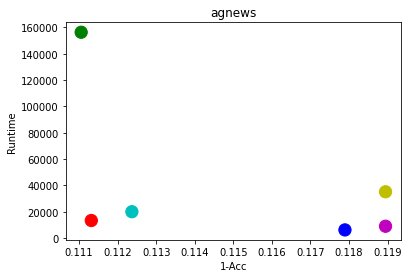

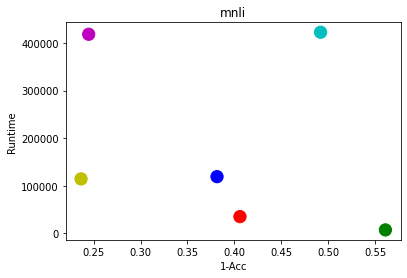

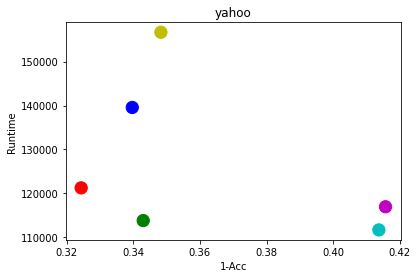

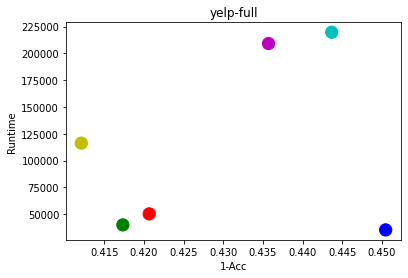

In [46]:
c=0
for dataset in datasets:
    fig = plt.figure()
    plt.title(f"{dataset}")
    plt.xlabel("1-Acc")
    plt.ylabel("Runtime")
    plt.scatter(1- np.array(acc_list[dataset]), np.array(runtime_list[dataset]),s=150,color=['r','g','b','y','c','m'])
    plt.savefig(f"../fig/c{c}.png")
    c=c+1

In [33]:
runtime_list

{'agnews': [13327.5, 156267.5, 6181.0, 35131.5, 19992.0, 8976.0],
 'mnli': [35153.0, 7207.5, 119168.5, 114397.5, 422770.0, 418504.5],
 'yahoo': [121250.0, 113809.0, 139556.0, 156680.0, 111679.0, 116951.0],
 'yelp-full': [50264.0, 39993.0, 35309.0, 116258.0, 219695.5, 209166.5]}